<a href="https://colab.research.google.com/github/syahma/Datamining/blob/main/TugasAkhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Setelah teori kita bisa pergi ke praktek. Pertama, mari impor semua file yang dibutuhkan Kedua, memuat data.

In [34]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [32]:
# load data
main_data = pd.read_csv('Video_games_esrb_rating.csv')

Mari kita lihat kepala kerangka data dan daftar kolom kita.

In [33]:
# fast looking (size of dataframe, columns, 5 first rows of data, Nan values)
print("The dataset has " + str(main_data.shape[0]) + " rows.")
print("And " + str(main_data.shape[1]) + " columns atleast.")

print("List of columns: ", main_data.columns)

main_data.head(5)

The dataset has 1895 rows.
And 34 columns atleast.
List of columns:  Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')


,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,T


Di sini kita dapat melihat bahwa kerangka data ini memiliki 1895 baris dan 34 kolom dan ada banyak fitur. Sebagai contoh,blood_and_gore, intense_violence, dll
Kita dapat melihat bahwa semua kolom tersebut termasuk angka: 0 dan 1. Penulis dataset ini menjelaskan bahwa 0 berarti tidak ada fitur ini dalam game dan 1 berarti ada fitur ini. Juga, ada kolom "Consol". Kolom ini berisi tentang konsol tempat game tersebut dirilis. Ini termasuk angka 0 dan 1 juga. Tapi artinya seperti itu: 0 = PS4, 1 = PS4 & Xbox_one. Jadi, kami memahami kolom apa dalam data ini.

Setelah itu kita dapat memeriksa nilai Nan dan null di sini.

In [13]:
procent_of_null = main_data.isnull().sum() / main_data.shape[0]
print(procent_of_null)

print("")

procent_of_nan = main_data.isna().sum() / main_data.shape[0]
print(procent_of_nan)

title                       0.0
console                     0.0
alcohol_reference           0.0
animated_blood              0.0
blood                       0.0
blood_and_gore              0.0
cartoon_violence            0.0
crude_humor                 0.0
drug_reference              0.0
fantasy_violence            0.0
intense_violence            0.0
language                    0.0
lyrics                      0.0
mature_humor                0.0
mild_blood                  0.0
mild_cartoon_violence       0.0
mild_fantasy_violence       0.0
mild_language               0.0
mild_lyrics                 0.0
mild_suggestive_themes      0.0
mild_violence               0.0
no_descriptors              0.0
nudity                      0.0
partial_nudity              0.0
sexual_content              0.0
sexual_themes               0.0
simulated_gambling          0.0
strong_janguage             0.0
strong_sexual_content       0.0
suggestive_themes           0.0
use_of_alcohol              0.0
use_of_d

Text(0.5, 1.0, 'Count of games on different consoles')

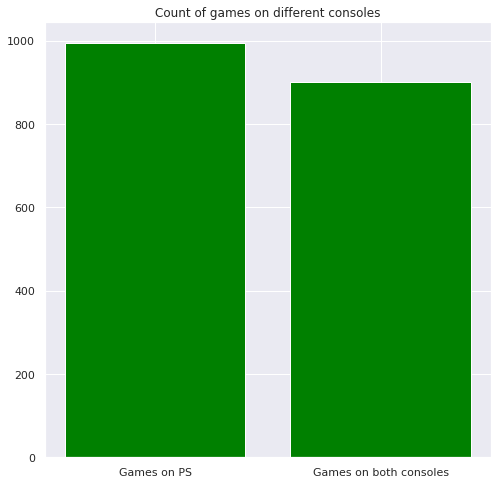

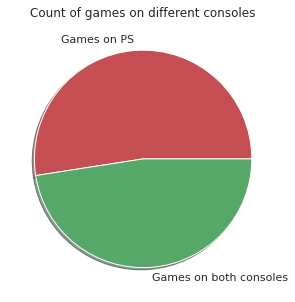

In [14]:
# size
plt.figure(figsize=(8, 8))

# pie and bar graphs
consoles_labels = ["Games on PS", "Games on both consoles"]

playstation = main_data[main_data["console"] == 0]
both_consoles = main_data[main_data["console"] == 1]

consoles_names = [len(playstation), len(both_consoles)]

plt.bar(consoles_labels, consoles_names, color = "green")
plt.title("Count of games on different consoles")

plt.figure(figsize=(19, 5))
plt.pie(consoles_names, labels = consoles_labels, shadow = True, colors = "rgbyc")
plt.title("Count of games on different consoles")

Di sini kita dapat melihat bahwa:

• Ada sedikit dari 1000 game di PlayStation, tetapi hanya 900 di kedua platform.

• Fakta pertama berarti ada lebih banyak eksklusif playstation daripada game di kedua platform.

• Rasio game PlayStation terhadap game di kedua platform adalah sekitar 51% hingga 49%.

Kedua dan setiap kolom berikutnya adalah tentang apakah permainan ini atau itu mencakup sesuatu. Itu sebabnya saya pikir kita bisa menghitung korelasi di antara mereka terlebih dahulu, mencari tahu kolom mana yang paling penting dan setelah itu memvisualisasikan kolom tersebut secara terpisah satu sama lain.

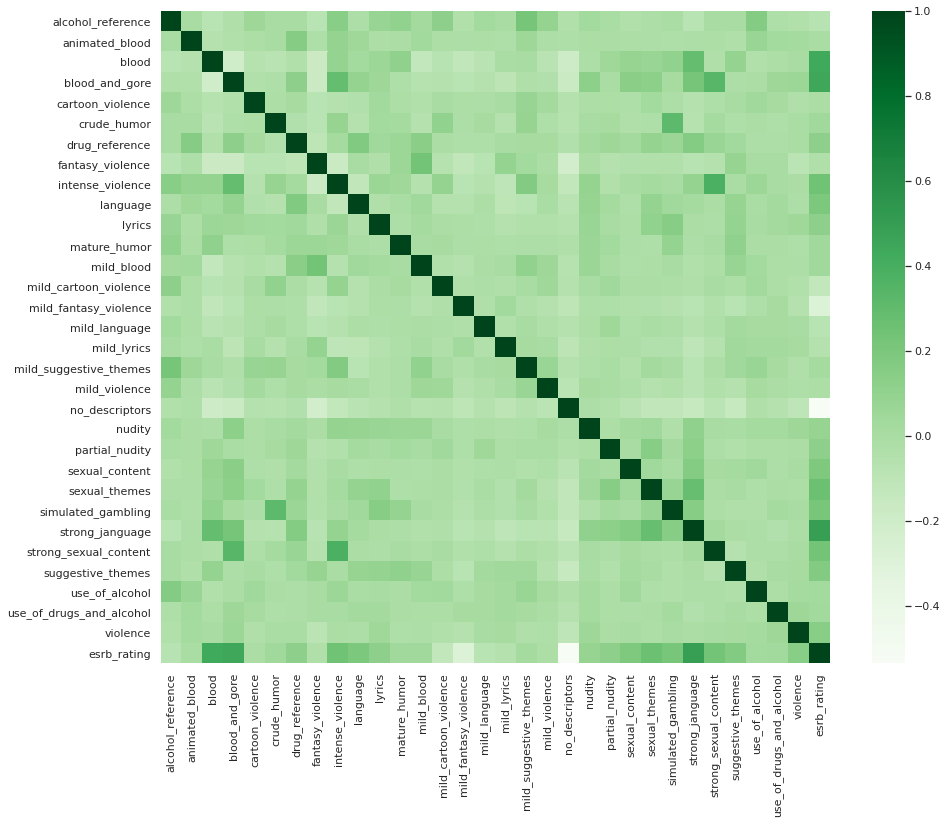

In [15]:
# correlation
# size
plt.figure(figsize=(15, 12))

useless_cols = ["title", "console"] 
corr_data = main_data.drop(useless_cols, axis = 1)

encode = {'E' : 0,
          'ET': 1,
          'T' : 2,
          'M' : 3}

corr_data["esrb_rating"] = corr_data["esrb_rating"].map(encode)

corr_cols = list(corr_data.columns)

main_correlation = corr_data[corr_cols].corr()
sns.heatmap(main_correlation, annot = False, cmap = "Greens")

Di sini kita dapat melihat bahwa:

• Kolom seperti Blood, Blood and Gore, Strong Language memiliki korelasi positif yang kuat dengan peringkat ESRB.

• Tapi nudity, drugs dan alcohol memiliki korelasi yang sangat rendah.

Nah, kami mencari tahu kolom fitur mana yang penting, sehingga kami dapat memvisualisasikannya. Mari kita mulai dari kolom Blood:

Text(0.5, 1.0, 'Is there blood?')

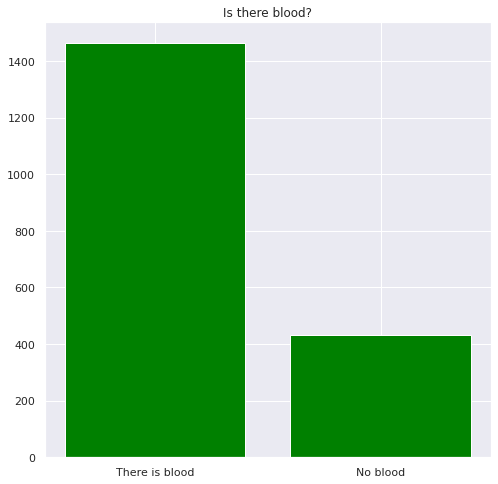

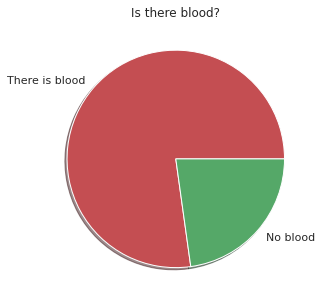

In [16]:
# about blood in video games
plt.figure(figsize=(8, 8))
blood_labels = ["There is blood", "No blood"]

blood_0 = main_data[main_data["blood"] == 0]
blood_1 = main_data[main_data["blood"] == 1]

blood_names = [len(blood_0), len(blood_1)]

plt.bar(blood_labels, blood_names, color = "green")
plt.title("Is there blood?")

plt.figure(figsize=(19, 5))
plt.pie(blood_names, labels = blood_labels, shadow = True, colors = "rgbyc")
plt.title("Is there blood?")

Di sini kita dapat melihat bahwa:

• Ada lebih banyak game dengan adegan blood daripada tanpa adegan itu.

• Ada lebih dari 1400 game komputer dengan adegan blood dalam kerangka data ini.

Blood dan Gore :

Text(0.5, 1.0, 'Is there blood and gore?')

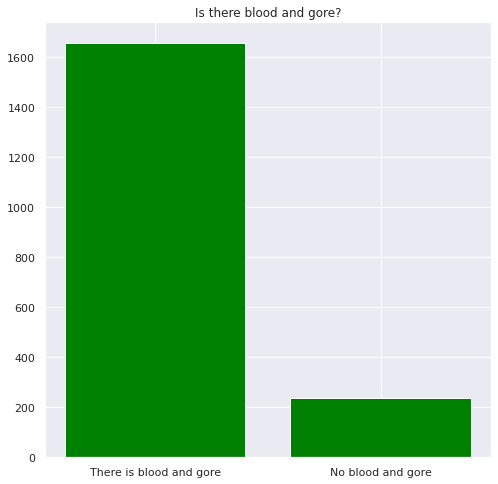

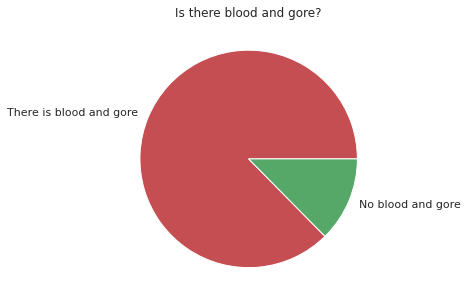

In [17]:
# blood and gore column
# size
plt.figure(figsize=(8, 8))
blood_and_gore_labels = ["There is blood and gore", "No blood and gore"]

blood_and_gore_0 = main_data[main_data["blood_and_gore"] == 0]
blood_and_gore_1 = main_data[main_data["blood_and_gore"] == 1]

blood_and_gore_names = [len(blood_and_gore_0), len(blood_and_gore_1)]

plt.bar(blood_and_gore_labels, blood_and_gore_names, color = "green")
plt.title("Is there blood and gore?")

plt.figure(figsize=(19, 5))
plt.pie(blood_and_gore_names, labels = blood_and_gore_labels,  colors = "rgbyc")
plt.title("Is there blood and gore?")

Di sini kita dapat melihat bahwa:

• Ada lebih banyak game dengan adegan blood dan gore daripada tanpa adegan itu.

• Ada lebih dari 1600 game komputer dengan adegan blood dan gore dalam bingkai data ini.

Dan bagaimana dengan Strong language :

Text(0.5, 1.0, 'Is there strong language?')

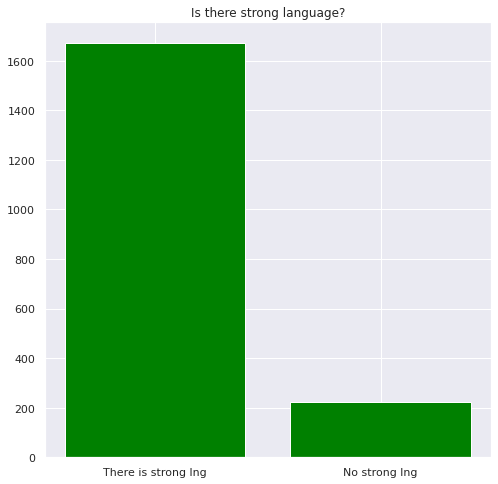

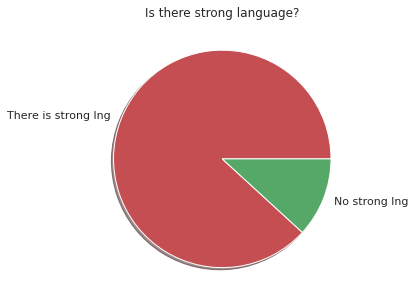

In [18]:
# about strong language
# size
plt.figure(figsize=(8, 8))
strong_lg_labels = ["There is strong lng", "No strong lng"]

strong_lg_0 = main_data[main_data["strong_janguage"] == 0]
strong_lg_1 = main_data[main_data["strong_janguage"] == 1]

strong_lg_names = [len(strong_lg_0), len(strong_lg_1)]

plt.bar(strong_lg_labels, strong_lg_names, color = "green")
plt.title("Is there strong language?")

plt.figure(figsize=(19, 5))
plt.pie(strong_lg_names, labels = strong_lg_labels, shadow = True, colors = "rgbyc")
plt.title("Is there strong language?")

Di sini kita dapat melihat bahwa:

• Ada lebih banyak game dengan adegan strong language daripada tanpa adegan itu.

• Ada lebih dari 1600 game komputer dengan adegan strong language dalam bingkai data ini.


Nah, mari kita pergi ke kolom rating. Jika diperhatikan dengan seksama kolom ini kita dapat melihat bahwa hanya ada 4 nilai unik. E, M, T, ET. saya akan menyiapkan daftar hanya untuk keempat nilai ini.

Text(0.5, 1.0, 'Rating distribution')

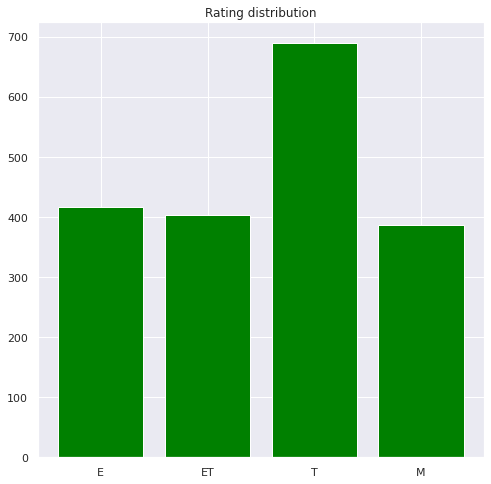

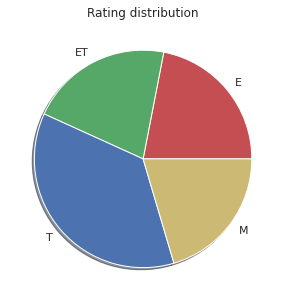

In [19]:
# ratings
# size
plt.figure(figsize=(8, 8))
rating_labels = ["E", "ET", "T", "M"]

E_rating = main_data[main_data["esrb_rating"] == "E"]
ET_rating = main_data[main_data["esrb_rating"] == "ET"]
T_rating = main_data[main_data["esrb_rating"] == "T"]
M_rating = main_data[main_data["esrb_rating"] == "M"]

rating_names = [len(E_rating), len(ET_rating), len(T_rating), len(M_rating)]

plt.bar(rating_labels, rating_names, color = "green")
plt.title("Rating distribution")

plt.figure(figsize=(19, 5))
plt.pie(rating_names, labels = rating_labels, shadow = True, colors = "rgbyc")
plt.title("Rating distribution")

Di sini kita dapat melihat bahwa:

• Ada banyak game dengan rating T, tetapi tidak banyak game dengan rating M dan ET.

• Juga, kita dapat melihat bahwa sekitar setengah dari semua game memiliki rating T (~690), game dengan rating E dan ET sekitar 410 – 400 dan game untuk dewasa hanya sekitar 390.

In [25]:
# load data
train_df = pd.read_csv('Video_games_esrb_rating.csv')
test_df = pd.read_csv('test_esrb.csv')

# split the data
x_train = np.array(train_df[train_df.columns[2:-1]])
y_train = np.array(train_df[train_df.columns[-1]])

x_test = np.array(test_df[test_df.columns[2:-1]])
y_test = np.array(test_df[test_df.columns[-1]])

Mari kita memuat ulang data untuk melatih bingkai data dan menguji bingkai data. Setelah kami melakukannya, kami dapat membagi data. Untuk menggunakannya kita tidak akan menggunakan train_test_split karena kita bisa melakukannya lebih mudah dengan Numpy.

In [26]:
#metric
from sklearn.metrics import accuracy_score

In [27]:
# 1)
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier version 1 model
dct1_model = DecisionTreeClassifier()

dct1_model.fit(x_train, y_train)
dct1_pred = dct1_model.predict(x_test)

dct1_pred_score_1 = accuracy_score(y_test, dct1_pred)

print("Prediction list of first dct: ", dct1_pred[:5])
print("Score of first dct: ", dct1_pred_score_1)

Prediction list of first dct:  ['T' 'E' 'ET' 'E' 'ET']
Score of first dct:  0.83


Model pertama adalah Pengklasifikasi Pohon Keputusan sederhana. Ini memiliki skor akurasi yang tidak buruk: 0,82. Bagaimana kita bisa melihat Pengklasifikasi Pohon Keputusan benar-benar bagus pada dataset ini. Itu sebabnya mari kita periksa skor Random Forest Classifier.

In [28]:
# 2)
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier vesion 1 model
rfc_1_model = RandomForestClassifier()

rfc_1_model.fit(x_train, y_train)
rfc_1_pred = rfc_1_model.predict(x_test)

rfc_1_pred_score_1 = accuracy_score(y_test, rfc_1_pred)

print("Prediction list of rfc: ", rfc_1_pred[:5])
print("Score of rfc: ", rfc_1_pred_score_1)

Prediction list of rfc:  ['T' 'E' 'M' 'E' 'T']
Score of rfc:  0.85


Random Forest Classifier lebih baik dari Decision Tree disini, karena memiliki nilai akurasi 0.85.

Akhirnya, kita dapat menumpuk model-model ini dan melihat apa yang akan menjadi hasil dari langkah ini.

In [29]:
# 3)
from sklearn.ensemble import StackingClassifier

estimators = [('dt', DecisionTreeClassifier()),
              ('rf', RandomForestClassifier())]

stc1_model = StackingClassifier(estimators=estimators)

stc1_model.fit(x_train, y_train)
stc1_pred = stc1_model.predict(x_test)

stc_1_pred_score_1 = accuracy_score(y_test, stc1_pred)

print("Prediction list of Stack classifier model: ", stc1_pred[:5])
print("Score of Stack classifier model: ", stc_1_pred_score_1)

Prediction list of Stack classifier model:  ['T' 'E' 'M' 'E' 'T']
Score of Stack classifier model:  0.852


Decision tree memiliki skor akurasi 0,82

Random Forest Classifier memiliki skor akurasi 0,85 ("pemenang" kami)

Stank model memiliki skor akurasi 0,848